# Optical Character Recognition - Computer Vision

Optical Character Recognition (OCR) is the process of extracting machine-readable text from images and video frames. In this notebook, we will build a small, practical OCR pipeline for real-time use:

- Load images or capture frames from a webcam
- Preprocess frames (grayscale, denoise, threshold) to enhance text
- Detect text regions and run a recognizer (Tesseract)
- Draw bounding boxes and overlay recognized text
- Evaluate results and discuss limits and improvements

By the end, you'll have a working template you can adapt to documents, screens, or camera feeds for fast, reliable text extraction.

## 1. Import Libraries

In [46]:
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt

## 2. Load Image
We will use a sample image to test the OCR pipeline.

In [55]:
image = cv2.imread('image.jpg')

Let's display the image. When we read an image with `cv2.imread()`, it is in BGR format. To display it correctly, we need to convert it to RGB.

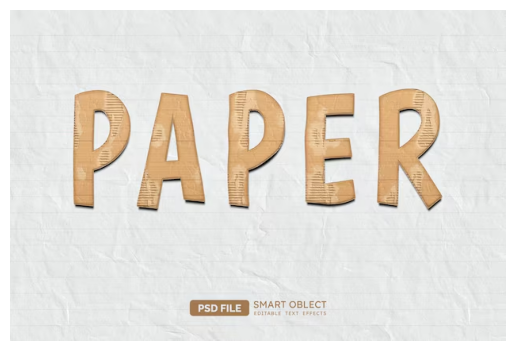

In [59]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 3. Preprocess Image
We will preprocess the image to enhance text detection.

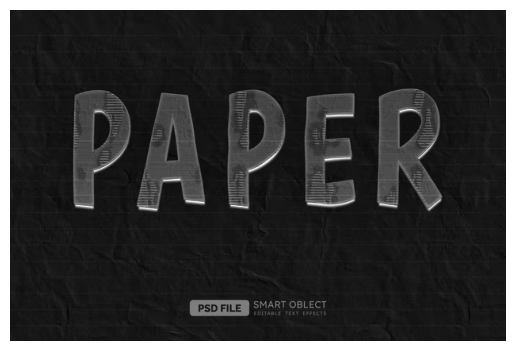

In [67]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='binary')
plt.axis('off')
plt.show()

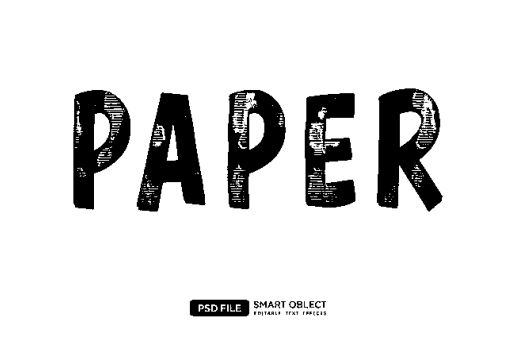

In [65]:
# Apply thresholding
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

plt.imshow(thresh, cmap='binary')
plt.axis('off')
plt.show()

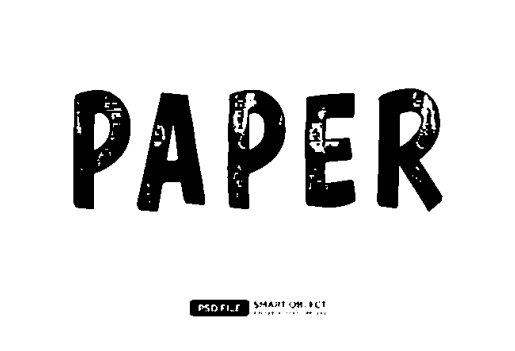

In [68]:
# Apply median blur
median = cv2.medianBlur(thresh, 3)

plt.imshow(median, cmap='binary')
plt.axis('off')
plt.show()

Real-world images are rarely clean. To make text more legible for OCR we:
- Convert to grayscale to remove color distractions and simplify intensity values.
- Apply Otsu's binary inverse threshold to separate foreground text from background.
- Use a light median blur (kernel=3) to suppress speckle noise while preserving edges.

These steps improve contrast and reduce noise, but over-aggressive denoising can erode thin character strokes. Adjust thresholds and kernel sizes per image.

## 4. Run OCR
We will run OCR with Tesseract on the preprocessed image.

### 4.1 Extract Text
If we want to extract the text from the image directly, we can use `pytesseract.image_to_string()`.

In [70]:
text = pytesseract.image_to_string(median)
print(text)

PAPER



### 4.2 Detect Text Regions and Draw Bounding Boxes
We will draw bounding boxes around the text in the image.

We will use `pytesseract.image_to_data()` to detect text regions. Then, we will draw bounding boxes.

In [71]:
data = pytesseract.image_to_data(median, output_type=pytesseract.Output.DICT)

In [74]:
data

{'level': [1, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1],
 'left': [0, 80, 80, 80, 80],
 'top': [0, 100, 100, 100, 100],
 'width': [626, 466, 466, 466, 466],
 'height': [418, 155, 155, 155, 155],
 'conf': [-1, -1, -1, -1, 26],
 'text': ['', '', '', '', 'PAPER']}

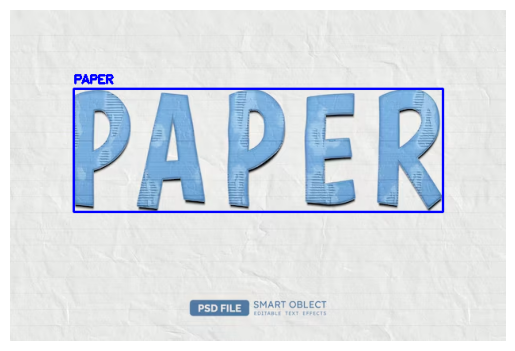

In [76]:
for i in range(len(data['text'])):
    if data['conf'][i] > 25:
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, data['text'][i], (x, y - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

plt.imshow(image)
plt.axis('off')
plt.show()

Think of each box as me pointing at a word and saying, "I see text here." 

Along with the box, Tesseract gives a confidence score. If you see `-1`, that’s Tesseract saying, "I’m not really sure this is text."

We set a confidence cutoff to decide which boxes to keep:
- Lower cutoff: you’ll keep more boxes, but some will be wrong (extra noise).
- Higher cutoff: results look cleaner, but you might miss faint or tiny words.

There isn’t one perfect number. Try a few values and pick the one that fits your images—balance between catching as much text as possible and avoiding boxes that aren’t really text.

## 5. Conclusion
Great work making it this far. You built a full mini OCR pipeline: loaded an
image, cleaned it up (grayscale, threshold, light denoise), read the text with Tesseract, and visualized what was found with boxes and confidences.

The big takeaway: OCR is sensitive to input quality. A small tweak—changing the
threshold type, kernel size, or confidence cutoff—can turn messy results into
readable text. When something looks off, adjust one thing at a time and check
the effect.

If you want to push this further, try these next steps:
- Test with different images (poor lighting, skewed text, tiny fonts)
- Add language/psm configs in Tesseract for your use case
- Move from static images to a webcam stream for real-time OCR
- Post-process text (spell-check, regex) to clean up outputs

With these tools, you’re ready to adapt OCR to documents, screens, or camera
feeds and make it work reliably in the wild.